In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [89]:
question = pd.read_csv('./data/schema.csv')
question.shape

(290, 3)

In [260]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [261]:
mcq = pd.read_csv('./data/multipleChoiceResponses.csv', encoding="ISO-8859-1")
mcq.shape

(16716, 228)

In [262]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [263]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
# import missingno as msno

# msno.matrix(mcq, figsize=(12,5))

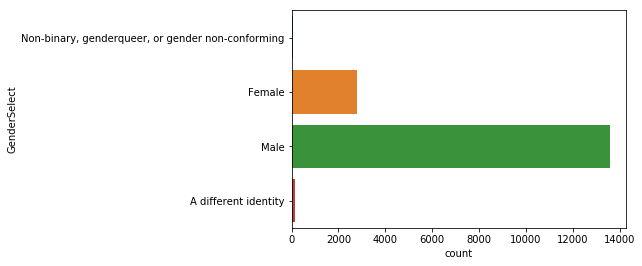

In [95]:
sns.countplot(y='GenderSelect', data=mcq)

In [96]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['국가'] = con_df.index
con_df.columns=['응답 수','국가']
con_df=con_df.reset_index().drop('index', axis=1)        #?????
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

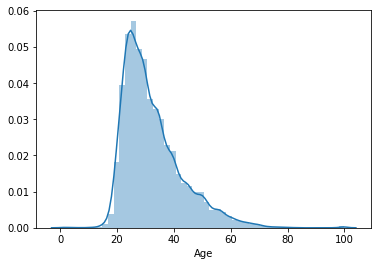

In [12]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

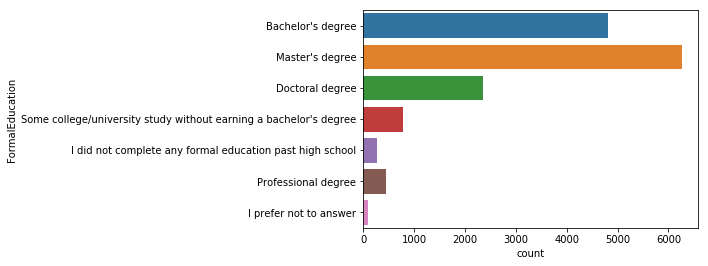

In [13]:
sns.countplot(data=mcq, y='FormalEducation')

In [14]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, right_index=True, left_index=True)
mcq_major_df.columns = ['응답수','응답비율']
mcq_major_df

,응답수,응답비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


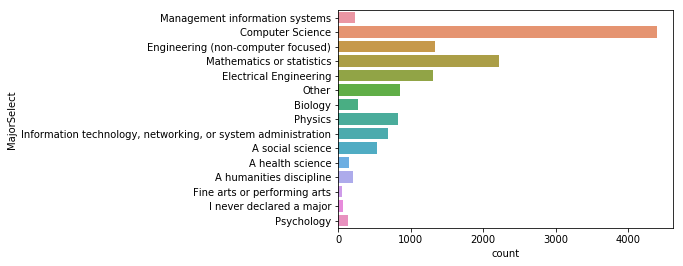

In [15]:
sns.countplot(data=mcq, y='MajorSelect')

In [16]:
mcq_es_count = pd.DataFrame(mcq['CurrentJobTitleSelect'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['CurrentJobTitleSelect'].value_counts(normalize=True))
mcq_es_df = mcq_major_count.merge(mcq_major_percent, right_index=True, left_index=True)
mcq_es_df.columns = ['응답수','응답비율']
mcq_es_df

,응답수,응답비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


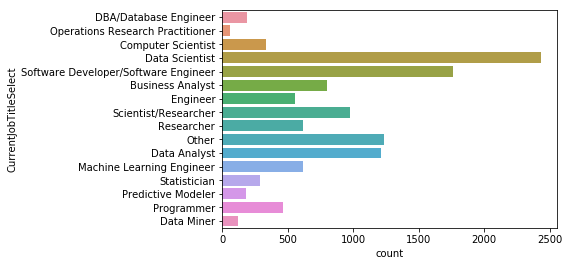

In [17]:
sns.countplot(data=mcq, y='CurrentJobTitleSelect')

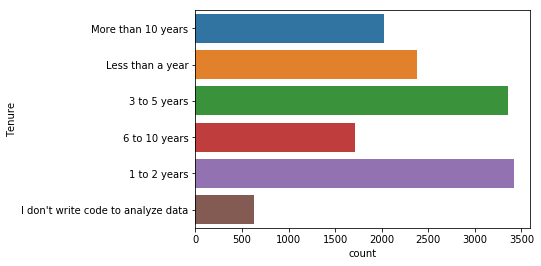

In [18]:
sns.countplot(y='Tenure', data=mcq)

In [19]:
mcq[mcq['Country'] == 'South Korea'].shape

(194, 228)

한국 설문 응답자 수 : 194


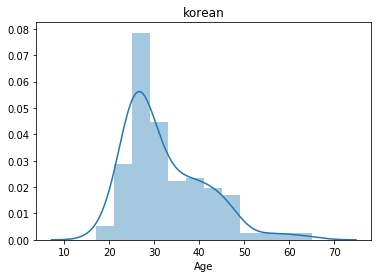

In [20]:
korea = mcq[mcq['Country'] == 'South Korea']

print("한국 설문 응답자 수 : " + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('korean')
plt.show()

In [21]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


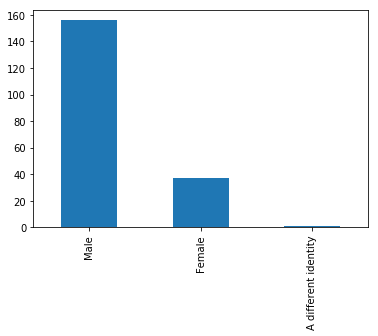

In [22]:
korea['GenderSelect'].value_counts().plot.bar()

Text(0.5, 1.0, 'korean Male')

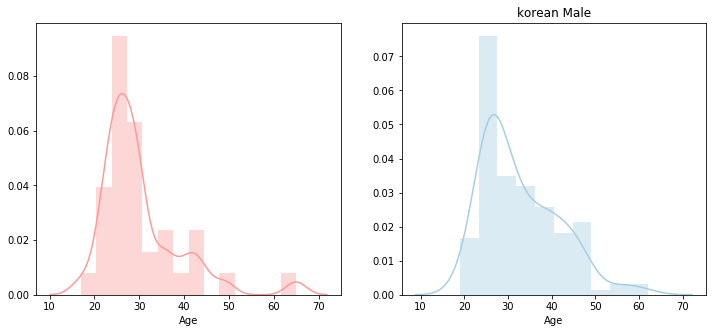

In [23]:
# 해석 불가!!!!!!!!
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

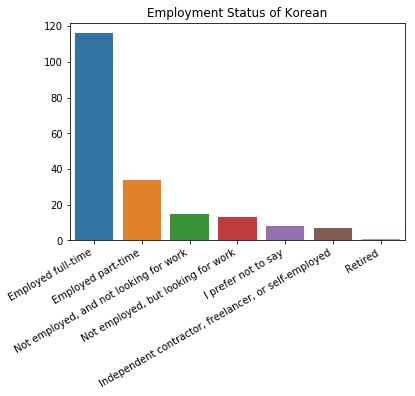

In [24]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment Status of Korean')
plt.ylabel('')
plt.show()

In [25]:
korea['EmploymentStatus'].value_counts()

Employed full-time                                      116
Not employed, but looking for work                       34
Not employed, and not looking for work                   15
Independent contractor, freelancer, or self-employed     13
I prefer not to say                                       8
Employed part-time                                        7
Retired                                                   1
Name: EmploymentStatus, dtype: int64

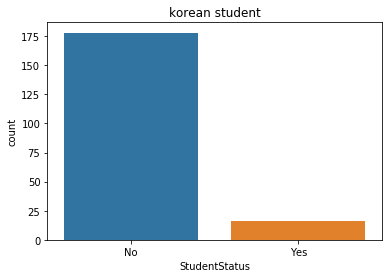

In [26]:
korea['StudentStatus']=korea['StudentStatus'].fillna('No')
sns.countplot(data=korea, x='StudentStatus')
plt.title('korean student')
plt.show()

# 설문조사 응답 분석2 - 데이터 사이언스 공부 어떻게 시작해야 될까요?

In [27]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

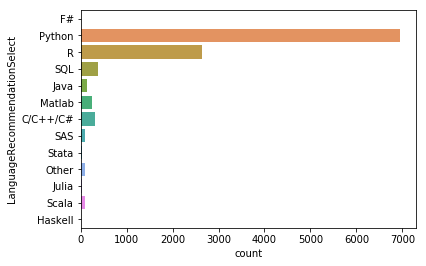

In [28]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

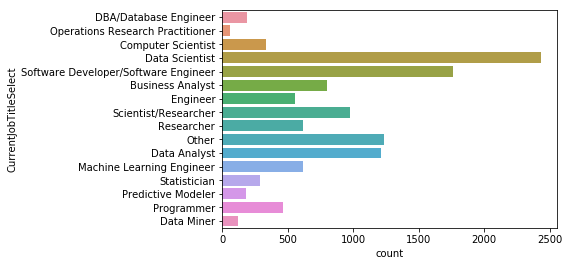

In [29]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [30]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

In [31]:
mcq[mcq['CurrentJobTitleSelect'].notnull()].shape

(11830, 228)

(9584, 228)


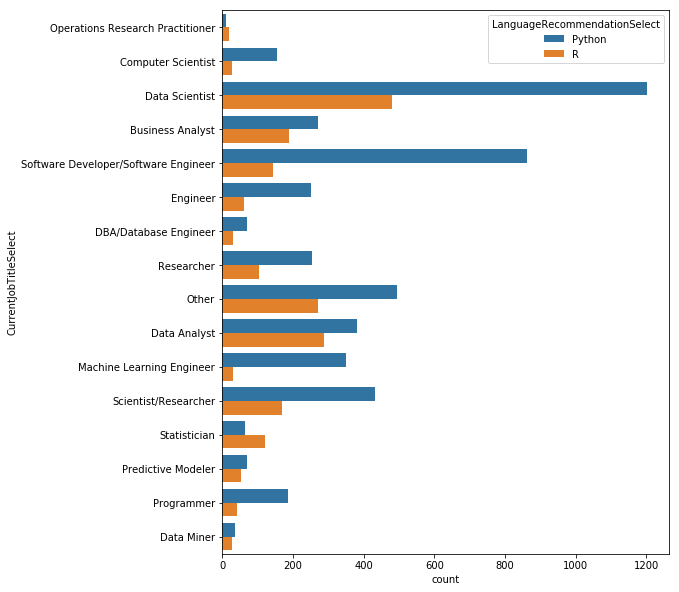

In [32]:
data = mcq[(mcq['LanguageRecommendationSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect']=='Python') | (mcq['LanguageRecommendationSelect']=='R')
)]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(data=data,
            y='CurrentJobTitleSelect',
            hue='LanguageRecommendationSelect')

In [33]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_too_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True)
mcq_ml_too_df.columns=['응답 수', '비율']
mcq_ml_too_df.head()

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916


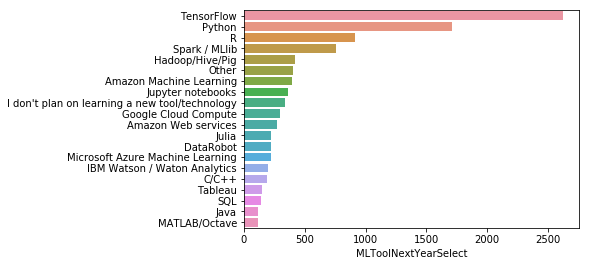

In [34]:
data = data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

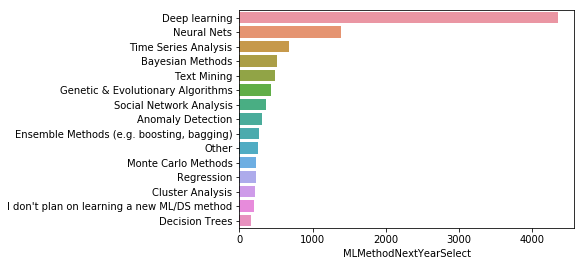

In [35]:
data = data=mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [36]:
data.index

Index(['Deep learning', 'Neural Nets', 'Time Series Analysis',
       'Bayesian Methods', 'Text Mining', 'Genetic & Evolutionary Algorithms',
       'Social Network Analysis', 'Anomaly Detection',
       'Ensemble Methods (e.g. boosting, bagging)', 'Other',
       'Monte Carlo Methods', 'Regression', 'Cluster Analysis',
       'I don't plan on learning a new ML/DS method', 'Decision Trees'],
      dtype='object')

In [37]:
########################################################################################################################

In [82]:
#astype('str') -> 형식을 문자열로 변경
# apply는 map과 비슷한 함수 온점(.) 앞의 객체를 X값으로 적용하여 괄호 연산 수행
# apply 함수 괄호 안 내용 : 콤마(,)를 기준으로 문자열 나누기
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))    #형식 변환

#위 과정을 통해 분할된 문자열에 시리즈 함수를 통해 프레임 형성
# axis =1 열을 기준으로 뎁스가 나뉨
# stack() : 프레임에 갇혀있던 구조에서 행X열 구조로 바뀜
# reset_index(level=1, drop=True) 
s= mcq.apply(lambda x : pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)

s.name = 'platform'

In [97]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

In [98]:
# s= mcq.apply(lambda x : pd.Series(x['LearningPlatformSelect']), axis=1) 결과
s

0                   College/University
0                          Conferences
0                             Podcasts
0                           Trade book
1                               Kaggle
2                                Arxiv
2                   College/University
2                               Kaggle
2                       Online courses
2                       YouTube Videos
3                                Blogs
3                   College/University
3                          Conferences
3                      Friends network
3               Official documentation
3                       Online courses
3                    Personal Projects
4                                Arxiv
4                          Conferences
4                               Kaggle
4                             Textbook
5                               Kaggle
5                       Online courses
5                   Stack Overflow Q&A
5                             Textbook
6                        

In [72]:
# .stack() 추가
# 앞이 행, 뒤가 열
s

0      0                ["['College/University'"
       1                        " 'Conferences'"
       2                           " 'Podcasts'"
       3                       " 'Trade book']"]
1      0                          ["['Kaggle']"]
2      0                             ["['Arxiv'"
       1                 " 'College/University'"
       2                             " 'Kaggle'"
       3                     " 'Online courses'"
       4                   " 'YouTube Videos']"]
3      0                             ["['Blogs'"
       1                 " 'College/University'"
       2                        " 'Conferences'"
       3                    " 'Friends network'"
       4             " 'Official documentation'"
       5                     " 'Online courses'"
       6                " 'Personal Projects']"]
4      0                             ["['Arxiv'"
       1                        " 'Conferences'"
       2                             " 'Kaggle'"
       3            

In [74]:
# reset_index() 까지 추가
s

,level_0,level_1,0
0,0,0,"['[""[\'College/University\'""'"
1,0,1,"' "" \'Conferences\'""'"
2,0,2,"' "" \'Podcasts\'""'"
3,0,3,"' "" \'Trade book\']""]']"
4,1,0,"['[""[\'Kaggle\']""]']"
5,2,0,"['[""[\'Arxiv\'""'"
6,2,1,"' "" \'College/University\'""'"
7,2,2,"' "" \'Kaggle\'""'"
8,2,3,"' "" \'Online courses\'""'"
9,2,4,"' "" \'YouTube Videos\']""]']"


In [76]:
# reset_index(level=1) 결과 : 행-열 중 행만 출력하도록 설정
# level=1
s

,level_1,0
0,0,"['[\'[""[\\\'College/University\\\'""\''"
0,1,"' \' "" \\\'Conferences\\\'""\''"
0,2,"' \' "" \\\'Podcasts\\\'""\''"
0,3,"' \' "" \\\'Trade book\\\']""]\']']"
1,0,"['[\'[""[\\\'Kaggle\\\']""]\']']"
2,0,"['[\'[""[\\\'Arxiv\\\'""\''"
2,1,"' \' "" \\\'College/University\\\'""\''"
2,2,"' \' "" \\\'Kaggle\\\'""\''"
2,3,"' \' "" \\\'Online courses\\\'""\''"
2,4,"' \' "" \\\'YouTube Videos\\\']""]\']']"


In [78]:
# reset_index(level=1, drop=True) 결과 : drop=True 명령문으로 인전 인덱스를 삭제했다.
s

0        ['[\'[\\\'["[\\\\\\\'College/University\\\\\\\...
0          ' \' \\\' " \\\\\\\'Conferences\\\\\\\'"\\\'\''
0             ' \' \\\' " \\\\\\\'Podcasts\\\\\\\'"\\\'\''
0         ' \' \\\' " \\\\\\\'Trade book\\\\\\\']"]\\\'...
1         ['[\'[\\\'["[\\\\\\\'Kaggle\\\\\\\']"]\\\']\']']
2               ['[\'[\\\'["[\\\\\\\'Arxiv\\\\\\\'"\\\'\''
2         ' \' \\\' " \\\\\\\'College/University\\\\\\\...
2               ' \' \\\' " \\\\\\\'Kaggle\\\\\\\'"\\\'\''
2         ' \' \\\' " \\\\\\\'Online courses\\\\\\\'"\\...
2         ' \' \\\' " \\\\\\\'YouTube Videos\\\\\\\']"]...
3               ['[\'[\\\'["[\\\\\\\'Blogs\\\\\\\'"\\\'\''
3         ' \' \\\' " \\\\\\\'College/University\\\\\\\...
3          ' \' \\\' " \\\\\\\'Conferences\\\\\\\'"\\\'\''
3         ' \' \\\' " \\\\\\\'Friends network\\\\\\\'"\...
3         ' \' \\\' " \\\\\\\'Official documentation\\\...
3         ' \' \\\' " \\\\\\\'Online courses\\\\\\\'"\\...
3         ' \' \\\' " \\\\\\\'Personal Projects\\\\\\\'.

In [99]:
s

0                   College/University
0                          Conferences
0                             Podcasts
0                           Trade book
1                               Kaggle
2                                Arxiv
2                   College/University
2                               Kaggle
2                       Online courses
2                       YouTube Videos
3                                Blogs
3                   College/University
3                          Conferences
3                      Friends network
3               Official documentation
3                       Online courses
3                    Personal Projects
4                                Arxiv
4                          Conferences
4                               Kaggle
4                             Textbook
5                               Kaggle
5                       Online courses
5                   Stack Overflow Q&A
5                             Textbook
6                        

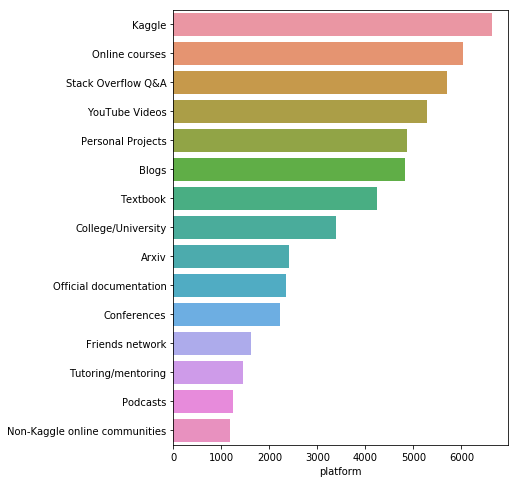

In [100]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [101]:
data.index

Index(['Kaggle', 'Online courses', 'Stack Overflow Q&A', 'YouTube Videos',
       'Personal Projects', 'Blogs', 'Textbook', 'College/University', 'Arxiv',
       'Official documentation', 'Conferences', 'Friends network',
       'Tutoring/mentoring', 'Podcasts', 'Non-Kaggle online communities'],
      dtype='object')

In [ ]:
#########################################################################################################3

In [102]:
qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [113]:
mcq

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# LearningPlatformUsefulness 라는 이름이 들어가는 칼럼을 찾기 위한 작업
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

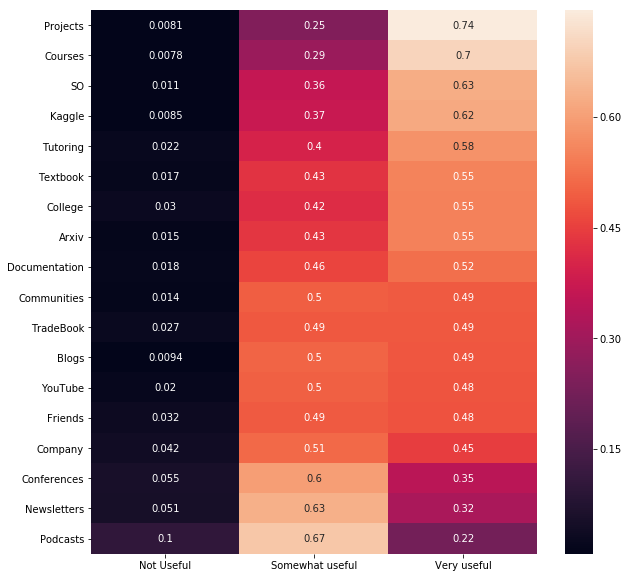

In [139]:
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

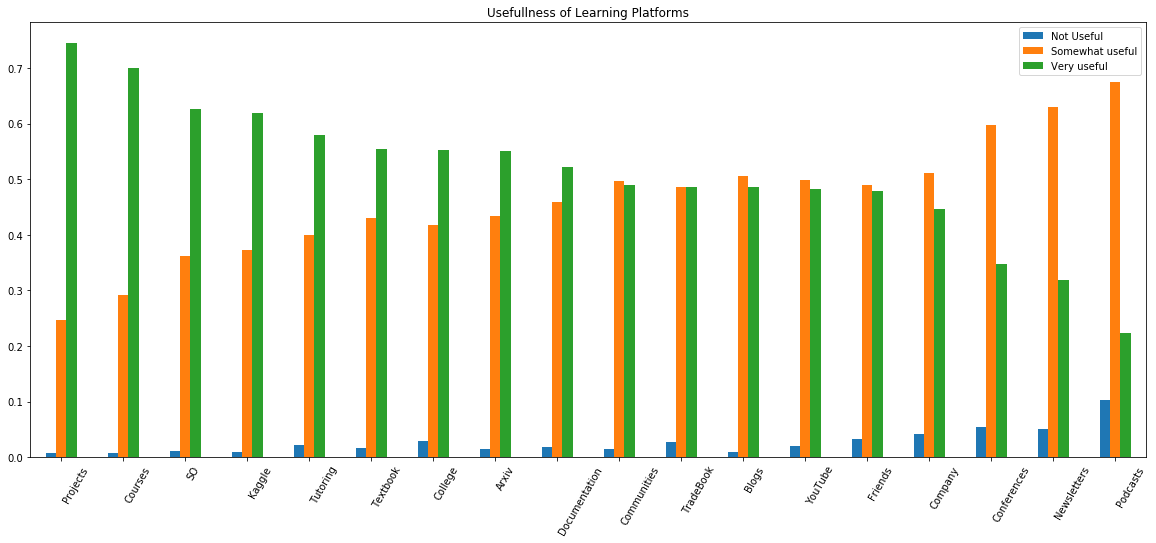

In [146]:
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='left')

In [147]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [148]:
len('LearningCategory')

16

In [153]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    print(cdf[feature[len('LearningCategory'):]])
cdf

33.36677092074147
27.375514246533598
15.217593341468994
16.98860691967688
5.531433795520342
1.795939644111807


{'SelftTaught': 33.36677092074147,
 'OnlineCourses': 27.375514246533598,
 'Work': 15.217593341468994,
 'University': 16.98860691967688,
 'Kaggle': 5.531433795520342,
 'Other': 1.795939644111807}

In [158]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [166]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [169]:
mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = 
mcq['HardwarePersonalProjectsSelect']

0                                                      NaN
1                                                      NaN
2                                   Basic laptop (Macbook)
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7        Basic laptop (Macbook),Gaming Laptop (Laptop +...
8                                                      NaN
9                                                      NaN
10       Laptop or Workstation and local IT supported s...
11                                                     NaN
12          Basic laptop (Macbook),Traditional Workstation
13                                                     NaN
14                                                     NaN
15                                                     NaN
16                                                     N

In [175]:
mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),
         axis = 1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

2                                   Basic laptop (Macbook)
7        Basic laptop (Macbook),Gaming Laptop (Laptop +...
10       Laptop or Workstation and local IT supported s...
12          Basic laptop (Macbook),Traditional Workstation
18                                  Basic laptop (Macbook)
19       Gaming Laptop (Laptop + CUDA capable GPU),Trad...
20                                  Basic laptop (Macbook)
29                             GPU accelerated Workstation
35       Laptop or Workstation and local IT supported s...
36               Gaming Laptop (Laptop + CUDA capable GPU)
38                                  Basic laptop (Macbook)
43                                  Basic laptop (Macbook)
46       Basic laptop (Macbook),GPU accelerated Worksta...
47                             GPU accelerated Workstation
50               Gaming Laptop (Laptop + CUDA capable GPU)
53       Basic laptop (Macbook),Laptop + Cloud service ...
56                                  Basic laptop (Macboo

In [180]:
s = s[s != 'nan']

In [183]:
pd.DataFrame(s.value_counts())

,hardware
Kaggle,6645
Online courses,6042
Stack Overflow Q&A,5703
YouTube Videos,5291
Personal Projects,4873
Blogs,4828
Textbook,4246
College/University,3397
Arxiv,2418
Official documentation,2354


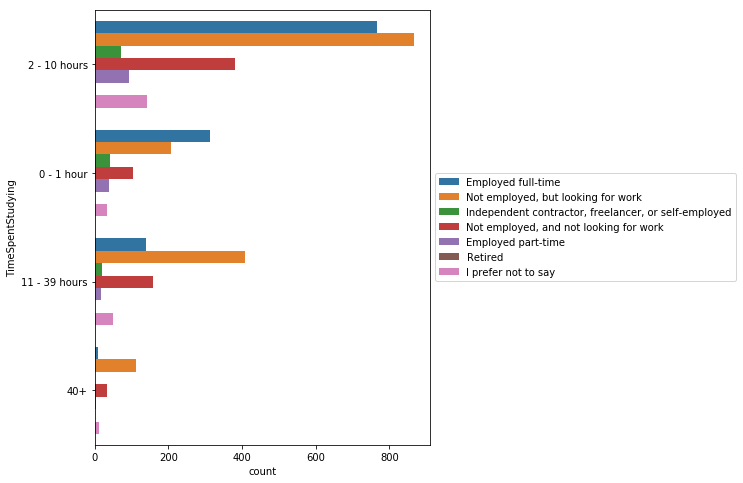

In [190]:
plt.figure(figsize=(6,8))
sns.countplot(data=mcq,
          y='TimeSpentStudying',
         hue='EmploymentStatus').legend(loc='center left',
                                       bbox_to_anchor=(1, 0.5))


In [198]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)
looking_for_job = mcq[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


In [193]:
mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Male,Brazil,26.0,Employed full-time,NaN,NaN,No,Yes,Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important
13,Male,Netherlands,54.0,Employed full-time,NaN,NaN,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


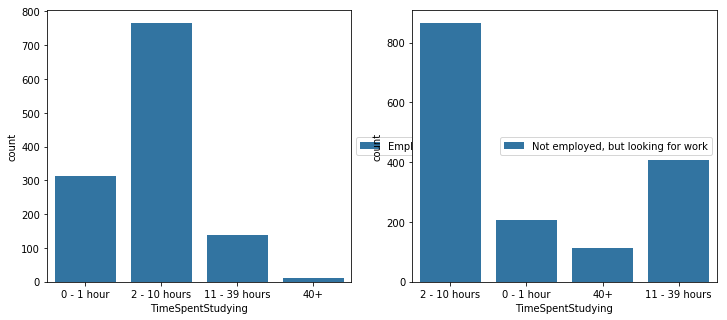

In [210]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
# plt.figure(figsize=(20,5))

sns.countplot(x='TimeSpentStudying',
             data=full_time,
             hue='EmploymentStatus',
             ax=ax1).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

# 설문조사 응답 분석3 - 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [229]:
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('./data/multipleChoiceResponses.csv',encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [230]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'
                                           ].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [234]:
mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
         axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

4828    1
1169    1
1238    1
996     1
3397    1
Name: platforms, dtype: int64

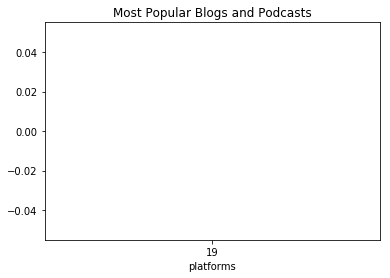

In [235]:
s = s[s!='nan'].value_counts().head(20)
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [236]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [['Becoming a Data Scientist Podcast',  'Data ...
1    [['Becoming a Data Scientist Podcast',  'Siraj...
2    [['FastML Blog',  'No Free Hunch Blog',  'Talk...
3                                 [['KDnuggets Blog']]
4    [['Data Machina Newsletter',  "Jack's Import A...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [237]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    ['Becoming a Data Scientist Podcast'
0               'Data Machina Newsletter'
0              "O'Reilly Data Newsletter"
0          'Partially Derivative Podcast'
0           'R Bloggers Blog Aggregator']
Name: platforms, dtype: object

In [238]:
s = s[s != 'nan'].value_counts().head(20)

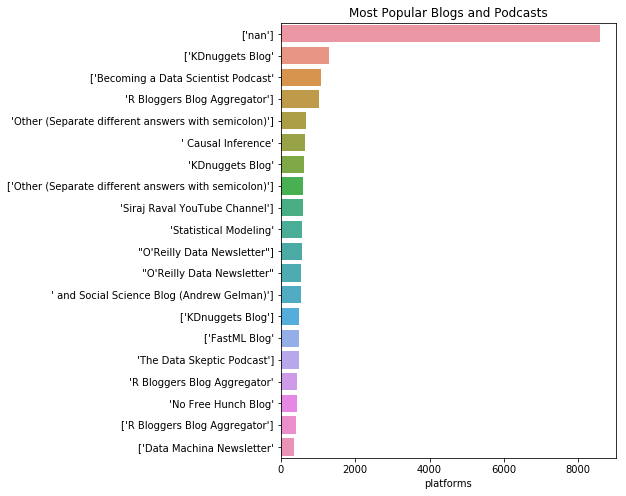

In [239]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [265]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x : x.split(','))
mcq['CoursePlatformSelect']

0                            [nan]
1                            [nan]
2                  [Coursera, edX]
3                            [nan]
4                            [nan]
5                            [nan]
6                            [nan]
7                       [Coursera]
8                            [nan]
9                            [nan]
10                      [Coursera]
11                           [nan]
12       [Coursera, DataCamp, edX]
13                           [nan]
14                           [nan]
15                           [nan]
16                           [nan]
17                           [nan]
18                           [nan]
19                           [nan]
20                         [Other]
21                           [nan]
22                           [nan]
23                           [nan]
24                           [nan]
25                           [nan]
26                           [nan]
27                           [nan]
28                  

In [266]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']
                                  ), axis=1).stack()
t

0      0         nan
1      0         nan
2      0    Coursera
       1         edX
3      0         nan
4      0         nan
5      0         nan
6      0         nan
7      0    Coursera
8      0         nan
9      0         nan
10     0    Coursera
11     0         nan
12     0    Coursera
       1    DataCamp
       2         edX
13     0         nan
14     0         nan
15     0         nan
16     0         nan
17     0         nan
18     0         nan
19     0         nan
20     0       Other
21     0         nan
22     0         nan
23     0         nan
24     0         nan
25     0         nan
26     0         nan
              ...   
16686  0         nan
16687  0         nan
16688  0         nan
16689  0         nan
16690  0         nan
16691  0         nan
16692  0         nan
16693  0         nan
16694  0         nan
16695  0         nan
16696  0         nan
16697  0         nan
16698  0         nan
16699  0         nan
16700  0         nan
16701  0         nan
16702  0     

In [267]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']
                                  ), axis=1).stack().reset_index(level=1, drop = True)
t

0             nan
1             nan
2        Coursera
2             edX
3             nan
4             nan
5             nan
6             nan
7        Coursera
8             nan
9             nan
10       Coursera
11            nan
12       Coursera
12       DataCamp
12            edX
13            nan
14            nan
15            nan
16            nan
17            nan
18            nan
19            nan
20          Other
21            nan
22            nan
23            nan
24            nan
25            nan
26            nan
           ...   
16686         nan
16687         nan
16688         nan
16689         nan
16690         nan
16691         nan
16692         nan
16693         nan
16694         nan
16695         nan
16696         nan
16697         nan
16698         nan
16699         nan
16700         nan
16701         nan
16702         nan
16703         nan
16704    Coursera
16705         nan
16706         nan
16707         nan
16708         nan
16709         nan
16710     

In [268]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']
                                  ), axis=1).stack().reset_index(drop = True)
t

0             nan
1             nan
2        Coursera
3             edX
4             nan
5             nan
6             nan
7             nan
8        Coursera
9             nan
10            nan
11       Coursera
12            nan
13       Coursera
14       DataCamp
15            edX
16            nan
17            nan
18            nan
19            nan
20            nan
21            nan
22            nan
23          Other
24            nan
25            nan
26            nan
27            nan
28            nan
29            nan
           ...   
18624         nan
18625         nan
18626         nan
18627         nan
18628         nan
18629         nan
18630         nan
18631         nan
18632         nan
18633         nan
18634         nan
18635         nan
18636         nan
18637         nan
18638         nan
18639         nan
18640         nan
18641         nan
18642    Coursera
18643         nan
18644         nan
18645         nan
18646         nan
18647         nan
18648     

In [259]:
t[t!='nan'].value_counts()

['nan']         14420
['Coursera'      1089
['Coursera']      636
 'Udacity']       596
 'edX'            322
 'DataCamp'       318
 'edX']           276
 'Other']         231
['Other']         125
['Udacity']       123
 'DataCamp']      120
['DataCamp'       103
['DataCamp']       97
['edX']            92
 'Udacity'         75
['edX'             20
['Udacity'         11
dtype: int64